<font size=6><b> 차원축소(PCA)

In [23]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

# DataLoad

In [5]:
dataset = load_iris()

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.columns = ['sl', 'sw', 'pl','pw', 'target']

In [14]:
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 상관분석
* 피쳐간 선형 다중공선 확인

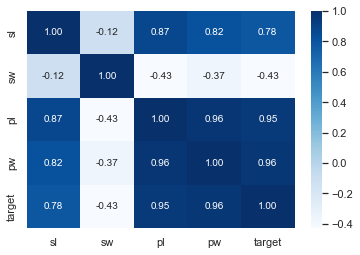

In [15]:
sns.heatmap(df.corr(), fmt=".2f" , annot=True, cmap="Blues")
plt.show()

* sl sw 상관관계가 없어 보인다
* p1 pw 강한 상관관계가 있다(0.95%)

## 우선 점수보자

In [18]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [25]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
f1_score(y_test, pred,  average='macro')

1.0

In [27]:
print( classification_report(y_test, pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# EDA

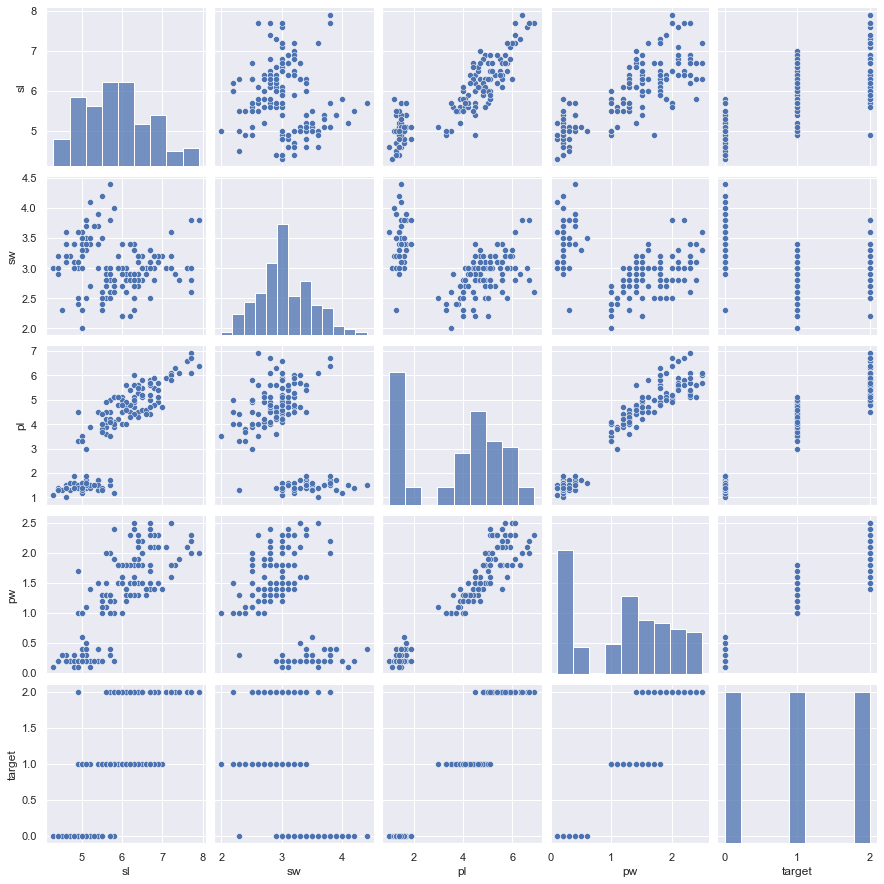

In [32]:
sns.pairplot(df)

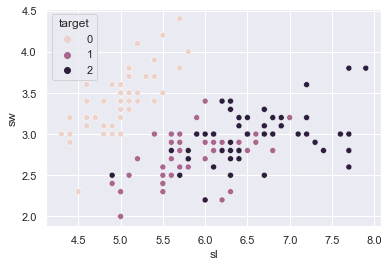

In [36]:
sns.scatterplot(x="sl", y="sw", data=df, hue="target")
plt.show()

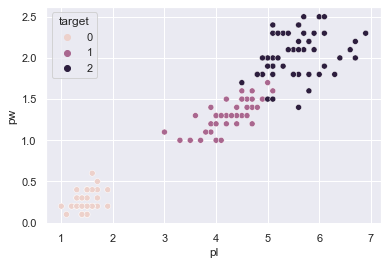

In [35]:
sns.scatterplot(x="pl", y="pw", data=df, hue="target")
plt.show()

# scaler

In [40]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1234)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler  = scaler.transform(X_test)

In [42]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train_scaler, y_train)
pred = rf.predict(X_test_scaler)
print(   f1_score(y_test, pred,  average='macro') )
print( classification_report(y_test, pred) )

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 다중공선 없에기

* pl 피쳐 삭제 후 점수 보기

In [28]:
dfcp = df.copy()

In [29]:
dfcp.drop("pl", axis=1, inplace=True)
dfcp.head()

,sl,sw,pw,target
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


In [30]:
y = dfcp['target']
X = dfcp.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1234)
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(   f1_score(y_test, pred,  average='macro') )
print( classification_report(y_test, pred) )

0.9670588235294119
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# PCA
* class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [31]:
from sklearn.decomposition import PCA

In [52]:
y = df['target']
X = df.drop(['target'], axis=1)

ncomp_list = [1,2,3]
for ncomp in ncomp_list:
    pca = PCA(n_components=ncomp, random_state=1234)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size=0.2, random_state=1234, stratify=y)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaler = scaler.transform(X_train)
    X_test_scaler  = scaler.transform(X_test)
    
    
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(X_train_scaler, y_train)
    pred = rf.predict(X_test_scaler)
    print(   f1_score(y_test, pred,  average='macro') )
    print( classification_report(y_test, pred) )

0.899749373433584
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

0.9665831244778613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.899749373433584
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0

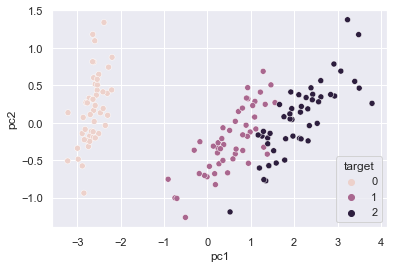

In [53]:
y = df['target']
X = df.drop(['target'], axis=1)

pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=["pc1","pc2"])
pca_df['target'] = y

sns.scatterplot(x="pc1", y="pc2", data=pca_df, hue="target")
plt.show()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size=0.2, random_state=1234, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler  = scaler.transform(X_test)


rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train_scaler, y_train)
pred = rf.predict(X_test_scaler)
print(   f1_score(y_test, pred,  average='macro') )
print( classification_report(y_test, pred) )
